# An example of an end to end modeling process

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Source for the penguin dataset:
https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris

In [5]:
# load the data set
penguin = pd.read_csv('penguins_size.csv')
# Drop rows with any NaN values
penguin = penguin.dropna()
penguin.keys()

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [6]:
# how many samples, how many features?
print(penguin.shape)


(334, 7)


In [9]:
# Encode species to get a numeric target
le = LabelEncoder()
penguin["species_encoded"] = le.fit_transform(penguin["species"])
target_names = le.classes_

# Define feature columns to use later
feature_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

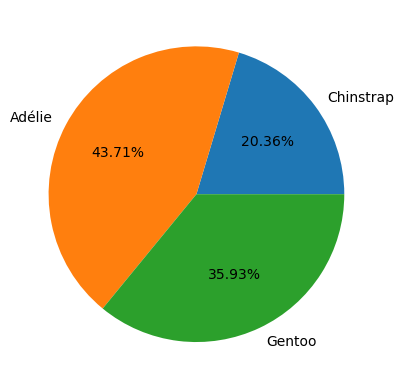

In [10]:
# What is the fraction of each penguin species?
l = ['Chinstrap', 'Adélie', 'Gentoo']
s = [sum(penguin.species=='Chinstrap'),sum(penguin.species=='Adelie'),sum(penguin.species=='Gentoo')]

fig, ax = plt.subplots()
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

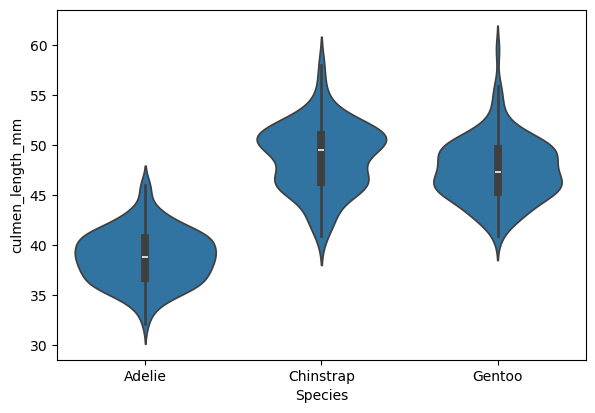

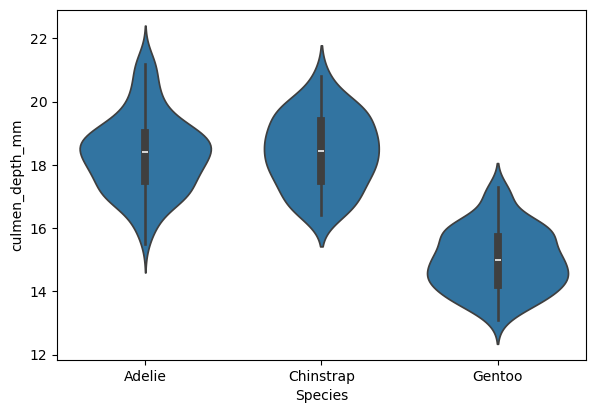

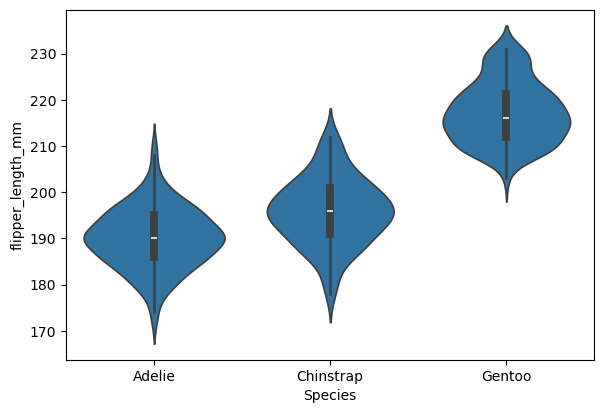

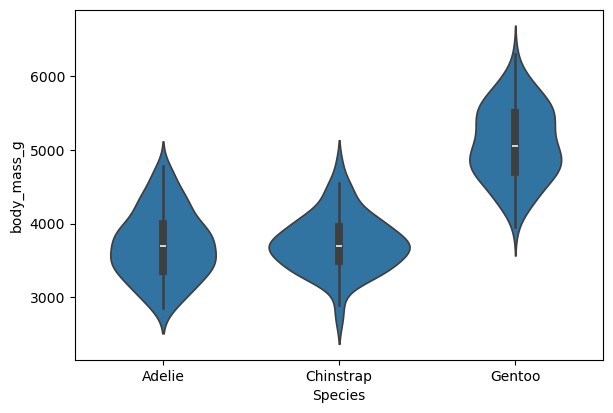

In [11]:
# Violin plots
for iFeature, feature in enumerate(feature_columns):
    plt.figure(figsize=(15, 10))
    plt.subplot(2,2,1)
    ax = sns.violinplot(x='species', y=feature, data=penguin)
    ax.set_ylabel(feature)
    ax.set_xlabel('Species')

In [12]:
# Features (numeric columns)
X = penguin[feature_columns]

# Target (already encoded)
y = penguin["species_encoded"]

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(X_test.shape)

(250, 4)
(84, 4)


In [13]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
model = LogisticRegression(max_iter=250)
model.fit(X_train_scaled, y_train)
y_pred_train = model.predict(X_test_scaled)
y_pred_test = model.predict(X_test_scaled)
print('Accuracy:',accuracy_score(y_pred_train,y_test))
print('Test Accuracy:',accuracy_score(y_pred_test,y_test))

Accuracy: 0.9880952380952381
Test Accuracy: 0.9880952380952381


# Overview of scikit-learn *estimators* 

For each 'model' object the following methods are available:

  + `model.fit()` : fit training data. For supervised learning applications,
    this accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`).
  + `model.predict()` : given a trained model, predict the label of a new set of data.
    This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`),
    and returns the prediced labels.
  + `model.predict_proba()` : For classification problems, some estimators also provide
    this method, which returns the probability that a new observation has each categorical label.
    In this case, the label with the highest probability is returned by `model.predict()`.
  + `model.transform()` : for data transformations this is the method that performs the transformation. It accepts one argument `X_new`, and returns the new representation of the data (e.g. `model.transform(X_new)`).
  + `model.fit_transform()` : some transformations implement this method,
    if they require some of the transformation parameters to be learned from data.
    It is a more efficient way to performs a fit and a transform on the same input data at once.
     
For a complete list of sklearn terms see here: https://scikit-learn.org/stable/glossary.html

In [ ]:
# --->>> Your Turn <<<---
# if you compare the penguins dataset to the iris dataset,
# what are the similarities and differences?
# what could be important for a ML classifier?

# iris is extremely small with only 150 samples, penguins has 344 samples
# however, penguins is not balanced, there are many more Adelie penguins 
# than the other two species, end especially few Chinstrap penguins
# Furthermore, if we loot at it closely (we will later), 
# threre are missing values in the penguins dataset, we will havet to
# deal with that